--- Arquivo Original (DRE ANUAL) ---
                               Ano Vigente      2019      2018      2017  \
0  Receita Líquida de Vendas e/ou Serviços  19886309  15590444  11984250   
1     Custo de Bens e/ou Serviços Vendidos -14332350 -11053022  -8378239   
2                          Resultado Bruto   5553961   4537422   3606011   
3                      Despesas Com Vendas  -3444112  -2747447  -2119953   
4        Despesas Gerais e Administrativas  -1188562   -759833   -679085   

      2016     2015     2014      2013     2012     2011  
0  9508746  8978259  9779385  22172922  7665112  6419371  
1 -6586130 -6399630 -7086909 -15247125 -5146597 -4275084  
2  2922615  2578629  2692476   6925797  2518515  2144287  
3 -1776258 -1720799 -1746258  -4365789 -1581049 -1270971  
4  -615545  -584280  -556882  -1429211  -481965  -441566  
------------------------------------------
--- Arquivo Original (Indicadores Econômicos) ---
           Discriminação  2020  2019  2018  2017  2016  201

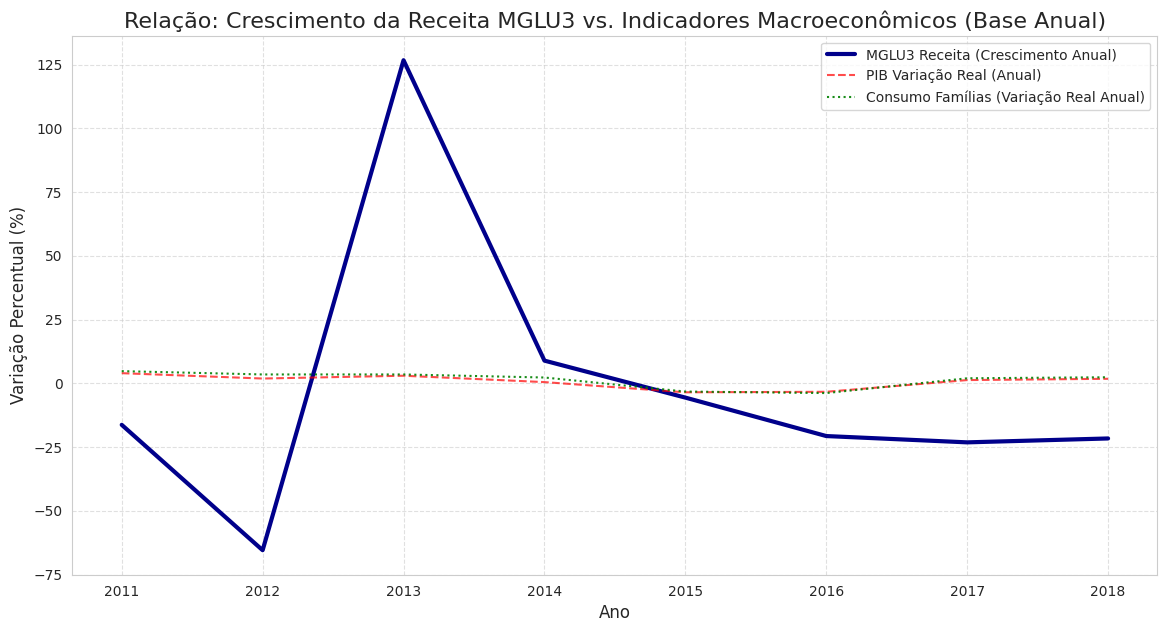

Gráfico exibido com sucesso.

Correlação MGLU3 Cresc. vs. Consumo Famílias: 0.1437


In [6]:
# IMPORTAÇÃO DE BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# CONFIGURAÇÃO DE VISUALIZAÇÃO
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Define o caminho base de onde o script está
# Usando Path.cwd() ou o caminho relativo
PASTA_DATA = Path('../Data')

# DRE ANUAL (CONTÉM A RECEITA LÍQUIDA)
ARQUIVO_DRE_ANUAL = PASTA_DATA / 'balanco_magazine luiza (tratado) - dem. resultados anual.csv'
# HEADER=0 (PRIMEIRA LINHA É O CABEÇALHO)
df_dre_anual = pd.read_csv(ARQUIVO_DRE_ANUAL)
print("--- Arquivo Original (DRE ANUAL) ---")
print(df_dre_anual.head())
print("------------------------------------------")

# TABELA 3 E 4 (CONTÉM PIB E CONSUMO DAS FAMÍLIAS)
ARQUIVO_MACRO_3_4 = PASTA_DATA / 'Tabela 3 e 4. Taxas de crescimento do PIB, desemprego, inflação, NUCI e câmbio - 2010-2020.csv'
df_macro_3_4 = pd.read_csv(ARQUIVO_MACRO_3_4, decimal=',') 
print("--- Arquivo Original (Indicadores Econômicos) ---")
print(df_macro_3_4.head())
print("------------------------------------------")

print("Arquivos carregados com sucesso.")

# TRATAMENTO DOS DADOS DA MGLU3 (SÉRIE TEMPORAL ANUAL)
df_mglu = df_dre_anual.copy()
df_mglu = df_mglu.rename(columns={df_mglu.columns[0]: 'Conta'}) 
df_mglu_t = df_mglu.set_index('Conta').T.reset_index().rename(columns={'index': 'Ano'})

# SELECIONAR A RECEITA LÍQUIDA E CALCULAR O CRESCIMENTO
NOME_RECEITA_LIQUIDA_ANUAL = 'Receita Líquida de Vendas e/ou Serviços' 
df_mglu_final = df_mglu_t[['Ano', NOME_RECEITA_LIQUIDA_ANUAL]].copy()
df_mglu_final.columns = ['Ano', 'Receita_MGLU3']

# CONVERSÃO DE TIPOS
df_mglu_final['Ano'] = pd.to_numeric(df_mglu_final['Ano'], errors='coerce', downcast='integer')
df_mglu_final['Receita_MGLU3'] = pd.to_numeric(df_mglu_final['Receita_MGLU3'], errors='coerce')

# CALCULAR CRESCIMENTO ANUAL (VARIAÇÃO A.A.)
df_mglu_final['MGLU3_Cresc_AA'] = df_mglu_final['Receita_MGLU3'].pct_change() * 100
df_mglu_final = df_mglu_final.dropna(subset=['MGLU3_Cresc_AA', 'Ano'])

print("\nDados da MGLU3 (Receita Líquida Anual) prontos.")

# LIMPEZA E TRANSPOSIÇÃO DA TABELA 3 E 4
df_macro_rel = df_macro_3_4[df_macro_3_4['Discriminação'].isin(['PIB', 'Consumo das Famílias'])].set_index('Discriminação')
df_macro_t = df_macro_rel.T.reset_index().rename(columns={'index': 'Ano'})

# SELEÇÃO E RENOMEAMENTO
df_macro_final = df_macro_t[['Ano', 'PIB', 'Consumo das Famílias']].copy()
df_macro_final.columns = ['Ano', 'PIB_Var_Real', 'Consumo_Familia_Var_Real']

# CONVERSÃO DE TIPOS
df_macro_final['Ano'] = pd.to_numeric(df_macro_final['Ano'], errors='coerce', downcast='integer')
df_macro_final['PIB_Var_Real'] = pd.to_numeric(df_macro_final['PIB_Var_Real'], errors='coerce')
df_macro_final['Consumo_Familia_Var_Real'] = pd.to_numeric(df_macro_final['Consumo_Familia_Var_Real'], errors='coerce')
df_macro_final = df_macro_final.dropna(subset=['PIB_Var_Real', 'Consumo_Familia_Var_Real', 'Ano'])

print("Dados Macroeconômicos (PIB e Consumo) prontos.")

# RELACIONAMENTO DAS PLANILHAS (MERGE)
df_relacionado = pd.merge(df_mglu_final, df_macro_final, on='Ano', how='inner')

print("\nRelacionamento concluído. Amostra da Tabela Final (Chave para o E-commerce):")
print(df_relacionado[['Ano', 'MGLU3_Cresc_AA', 'PIB_Var_Real', 'Consumo_Familia_Var_Real']].tail(10))

# ANÁLISE DE RELAÇÃO (VISUALIZAÇÃO E CORRELAÇÃO)
print("\nGerando Gráfico de Série Temporal...")

# DEFINIR O TAMANHO DA FIGURA
plt.figure(figsize=(14, 7))

# PLOTAR CRESCIMENTO MGLU3 (SÉRIE TEMPORAL)
sns.lineplot(x='Ano', y='MGLU3_Cresc_AA', data=df_relacionado, 
             label='MGLU3 Receita (Crescimento Anual)', 
             color='darkblue', linewidth=3) 
# PLOTAR VARIAÇÃO DO PIB (VARIÁVEL EXÓGENA)
sns.lineplot(x='Ano', y='PIB_Var_Real', data=df_relacionado, 
             label='PIB Variação Real (Anual)', 
             color='red', linestyle='--', alpha=0.7)


# PLOTAR CONSUMO DAS FAMÍLIAS
sns.lineplot(x='Ano', y='Consumo_Familia_Var_Real', data=df_relacionado, 
             label='Consumo Famílias (Variação Real Anual)', 
             color='green', linestyle=':', alpha=0.9)


# TÍTULOS E RÓTULOS
plt.title('Relação: Crescimento da Receita MGLU3 vs. Indicadores Macroeconômicos (Base Anual)', fontsize=16)
plt.ylabel('Variação Percentual (%)', fontsize=12)
plt.xlabel('Ano', fontsize=12)

# CONFIGURAÇÃO DO EIXO X
plt.xticks(df_relacionado['Ano'].unique())
plt.grid(True, linestyle='--', alpha=0.6)

# LEGENDAS
plt.legend(loc='upper right', fontsize=10)
plt.show()

print("Gráfico exibido com sucesso.")

# CÁLCULO DA CORRELAÇÃO DE PEARSON (MANTENDO PARA CONTEXTO ANALÍTICO)
df_corr = df_relacionado.dropna(subset=['MGLU3_Cresc_AA', 'PIB_Var_Real', 'Consumo_Familia_Var_Real'])
correlation_consumo = df_corr['MGLU3_Cresc_AA'].corr(df_corr['Consumo_Familia_Var_Real'])

print(f"\nCorrelação MGLU3 Cresc. vs. Consumo Famílias: {correlation_consumo:.4f}")

